# Model Building using the Word2Vec dataset

In this notebook different models are trained and evaluated with the **word2vec** vectorized dataset. All the models have been evaluated and the metrics that evaluated these model are tabulated in the end.

--------

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report, precision_score, recall_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
x = pd.read_csv('encoded_text_w2v.csv')
x

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.249856,-0.050854,0.030935,-0.351382,0.033219,-0.058349,0.110248,0.018460,0.173916,-1.007023,...,0.115080,-0.176572,-0.166385,-0.121687,-0.047989,0.114495,-0.194525,-0.139248,-0.004480,-0.014844
1,-0.164160,-0.035786,-0.014735,-0.271354,0.037697,-0.126913,0.152547,0.029490,0.193237,-0.932266,...,0.104443,-0.258246,-0.086179,-0.097104,-0.052362,0.049070,-0.207569,-0.124764,-0.065387,-0.083582
2,-0.326452,0.057538,0.047241,-0.338644,0.064403,-0.074655,0.088644,0.020399,0.222410,-0.968301,...,0.228973,-0.075547,-0.277537,-0.185737,0.030159,0.111392,-0.253248,-0.191022,0.047089,-0.013120
3,-0.312744,0.138061,0.069614,-0.257651,0.019416,-0.007842,-0.008854,0.107746,0.049465,-1.243163,...,0.056566,-0.183118,-0.222640,-0.140086,0.117841,0.151648,-0.240118,-0.092160,0.019501,-0.006918
4,-0.180472,0.022471,0.017628,-0.297219,0.066435,-0.123548,0.097502,0.011459,0.130353,-1.147019,...,0.084755,-0.260095,-0.152116,-0.058447,0.044366,0.196300,-0.192696,-0.229484,-0.092048,-0.044315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,-0.102191,0.115240,-0.027630,-0.103343,-0.063028,-0.095374,-0.146780,-0.027789,-0.044502,-1.186737,...,-0.132021,-0.185583,-0.163717,-0.028595,0.199349,0.149589,-0.098094,-0.062192,-0.082358,-0.049935
75,-0.162085,0.117216,0.006409,-0.094791,-0.059341,-0.098274,-0.070544,0.086802,-0.041733,-1.106633,...,-0.055869,-0.121071,-0.218986,-0.026049,0.161787,0.130823,-0.116558,-0.086333,-0.100589,-0.036281
76,-0.236896,0.136646,-0.062693,-0.059210,-0.098569,-0.098378,-0.153881,0.056844,-0.041303,-1.102772,...,-0.066631,-0.194528,-0.245374,-0.024017,0.205593,-0.006095,-0.065380,-0.068579,-0.092479,-0.010701
77,-0.194023,0.099164,-0.011265,-0.015472,-0.036116,-0.114212,-0.086774,0.090555,-0.063999,-0.985517,...,-0.067504,-0.106864,-0.243503,-0.022267,0.199015,0.075564,-0.146144,-0.050653,-0.140483,-0.061457


In [3]:
y = pd.read_csv('targets.csv', index_col = 0)
y

,Category
0,PeopleSoft Developer
1,PeopleSoft Developer
2,PeopleSoft Developer
3,PeopleSoft Developer
4,PeopleSoft Developer
...,...
74,Work_Day Developer
75,Work_Day Developer
76,Work_Day Developer
77,Work_Day Developer


In [4]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x_enc = mm.fit_transform(x)

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_enc = le.fit_transform(y)

In [6]:
y_enc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_enc,y_enc, test_size=0.2, random_state=42, stratify=y)
x_train.shape, x_test.shape

((63, 300), (16, 300))

## KNN Classifier

In [8]:
model_knn = KNeighborsClassifier(n_neighbors=41)
model_knn.fit(x_train, y_train)
y_pred = model_knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_knn.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_knn.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_knn,classification_report(y_test, y_pred)))
nb_score = model_knn.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_knn = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_knn = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_knn = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_knn = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.75
Accuracy of  test set    : 0.88
Classification report for classifier KNeighborsClassifier(n_neighbors=41):
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.83      1.00      0.91         5
           2       1.00      0.33      0.50         3
           3       1.00      1.00      1.00         4

    accuracy                           0.88        16
   macro avg       0.91      0.83      0.82        16
weighted avg       0.90      0.88      0.85        16




## Decision Tree Classifier

In [9]:
model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(x_train, y_train)
y_pred = model_DT.predict(x_test)
accuracy_DT = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_DT.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_DT.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_DT,classification_report(y_test, y_pred)))
nb_score = model_DT.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_DT = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_DT= round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_DT = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_DT = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.94
Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.80      0.89         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.95      0.95      0.94        16
weighted avg       0.95      0.94      0.94        16




## Random Forest Classifier

In [10]:
model_RF = RandomForestClassifier(n_estimators=200)
model_RF.fit(x_train, y_train)
y_pred = model_RF.predict(x_test)
accuracy_RF = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_RF.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_RF.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_RF,classification_report(y_test, y_pred)))
nb_score = model_RF.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_RF = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_RF = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_RF = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_RF = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier RandomForestClassifier(n_estimators=200):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16




## Support Vector Classifier

In [11]:
model_svm = SVC()
model_svm.fit(x_train, y_train)
y_pred = model_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_svm.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_svm.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_svm,classification_report(y_test, y_pred)))
nb_score = model_svm.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_svm = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_svm = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_svm = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_svm = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.98
Accuracy of  test set    : 1.00
Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16




## Logistic Regression Classifier

In [12]:
model_lgr = LogisticRegression()
model_lgr.fit(x_train, y_train)
y_pred = model_lgr.predict(x_test)
accuracy_lgr = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_lgr.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_lgr.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_lgr,classification_report(y_test, y_pred)))
nb_score = model_lgr.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_lgr = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_lgr = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_lgr = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_lgr = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier LogisticRegression():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16




## Bagging Classifier

In [13]:
model_bagg = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=0.5)
model_bagg.fit(x_train, y_train)
y_pred = model_bagg.predict(x_test)
accuracy_bagg = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_bagg.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_bagg.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_bagg,classification_report(y_test, y_pred)))
nb_score = model_bagg.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_bagg = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_bagg = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_bagg = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_bagg = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.95
Accuracy of  test set    : 0.94
Classification report for classifier BaggingClassifier(estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      0.67      0.80         3
           3       0.80      1.00      0.89         4

    accuracy                           0.94        16
   macro avg       0.95      0.92      0.92        16
weighted avg       0.95      0.94      0.93        16




## AdaBoost Classifier

In [14]:
model_Adaboost = AdaBoostClassifier(n_estimators=100)
model_Adaboost.fit(x_train, y_train)
y_pred = model_Adaboost.predict(x_test)
accuracy_Adaboost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_Adaboost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_Adaboost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_Adaboost,classification_report(y_test, y_pred)))
nb_score = model_Adaboost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Adaboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Adaboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Adaboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Adaboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.79
Accuracy of  test set    : 0.69
Classification report for classifier AdaBoostClassifier(n_estimators=100):
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.57      0.80      0.67         5
           2       0.00      0.00      0.00         3
           3       0.75      0.75      0.75         4

    accuracy                           0.69        16
   macro avg       0.53      0.64      0.58        16
weighted avg       0.57      0.69      0.62        16




## Gradient Boosting Classifier

In [15]:
model_GradientBoost = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=1, random_state=0)
model_GradientBoost.fit(x_train, y_train)
y_pred = model_GradientBoost.predict(x_test)
accuracy_GradientBoost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_GradientBoost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_GradientBoost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_GradientBoost,classification_report(y_test, y_pred)))
nb_score = model_GradientBoost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Gradientboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Gradientboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Gradientboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Gradientboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier GradientBoostingClassifier(max_depth=1, random_state=0):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16




## Multinomial Naive Bayes Classifier

In [16]:
model_MNB =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
model_MNB.fit(x_train, y_train)
y_pred = model_MNB.predict(x_test)
accuracy_MNB = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_MNB.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_MNB.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_MNB,classification_report(y_test, y_pred)))
mnb_score = model_MNB.score(x_test, y_test)
mnb_cm = confusion_matrix(y_test, y_pred)

precision_MNB = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_MNB = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_MNB = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_MNB = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.97
Accuracy of  test set    : 1.00
Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16




## Gaussian Naive Bayes Classifier

In [17]:
model_GNB = GaussianNB()
model_GNB.fit(x_train, y_train)
y_pred = model_GNB.predict(x_test)
accuracy_GNB = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_GNB.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_GNB.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_GNB,classification_report(y_test, y_pred)))
gnb_score = model_GNB.score(x_test, y_test)
gnb_cm = confusion_matrix(y_test, y_pred)

precision_GNB = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_GNB = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_GNB = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_GNB = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.98
Accuracy of  test set    : 1.00
Classification report for classifier GaussianNB():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16




## Bernoulli Naive Bayes Classifier

In [18]:
model_BNB = BernoulliNB(alpha=1, fit_prior=False, class_prior=None)
model_BNB.fit(x_train, y_train)
y_pred = model_BNB.predict(x_test)
accuracy_BNB = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_BNB.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_BNB.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_BNB,classification_report(y_test, y_pred)))
bnb_score = model_BNB.score(x_test, y_test)
bnb_cm = confusion_matrix(y_test, y_pred)

precision_BNB = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_BNB = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_BNB = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_BNB = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.49
Accuracy of  test set    : 0.25
Classification report for classifier BernoulliNB(alpha=1, fit_prior=False):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         3
           3       0.25      1.00      0.40         4

    accuracy                           0.25        16
   macro avg       0.06      0.25      0.10        16
weighted avg       0.06      0.25      0.10        16




## Neural Networks Classifier

In [19]:
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout

In [20]:
from keras.utils import to_categorical

In [21]:
dummy_y_train = to_categorical(y_train)
dummy_y_test = to_categorical(y_test)

In [22]:
def create_model():
    model = Sequential()
    model.add(Dense(512,input_dim = x_train.shape[1],kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(256,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(4,activation = 'softmax'))
    
    adam = Adam(lr = 0.1) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'categorical_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

ann = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 4,epochs = 100)

ann.fit(x_train, dummy_y_train)

y_pred_train = ann.predict(x_train)

y_pred_test = ann.predict(x_test)



1/1 [==============================] - 0s 38ms/step


In [23]:
print('Accuracy of training set : {:.2f}'.format(ann.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(ann.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (ann,classification_report(y_test, y_pred_test)))

ann_score = ann.score(x_test, y_test)
ann_cm = confusion_matrix(y_test, y_pred_test)

precision_ann = round(precision_score(y_test,y_pred_test,average = 'macro'),2)
recall_ann = round(recall_score(y_test,y_pred_test, average = 'macro'),2)
f1_ann = round(f1_score(y_test,y_pred_test, average = 'macro'),2)
accuracy_ann = round(accuracy_score(y_test,y_pred_test),2)

Accuracy of training set : 0.27
Accuracy of  test set    : 0.31
Classification report for classifier <keras.wrappers.scikit_learn.KerasClassifier object at 0x00000245C2F13040>:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.31      1.00      0.48         5
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         4

    accuracy                           0.31        16
   macro avg       0.08      0.25      0.12        16
weighted avg       0.10      0.31      0.15        16




## Results

In [24]:
Evaluation = {"Models":["KNN Classifier","DecisionTree Classifier","RandomForest Classifier","SVM Classifier",
                        "Logistic Regression","Bagging Classifier","AdaBoost Classifier","Gradient Boosting Classifier","Multinomial Naive Bayes Classifier", "Gaussian Naive Bayes Classifier", "Bernoulli Naive Bayes","ANN"],\
            "Train_Accuracy(%)":[model_knn.score(x_train, y_train),model_DT.score(x_train, y_train),model_RF.score(x_train, y_train),model_svm.score(x_train, y_train),model_lgr.score(x_train, y_train),
                                 model_bagg.score(x_train, y_train),model_Adaboost.score(x_train, y_train),model_GradientBoost.score(x_train, y_train), model_MNB.score(x_train, y_train), model_GNB.score(x_train, y_train), model_BNB.score(x_train, y_train),ann.score(x_train, y_train)],
            "Test_Accuracy(%)":[accuracy_knn,accuracy_DT,accuracy_RF,accuracy_svm,accuracy_lgr,accuracy_bagg,accuracy_Adaboost,accuracy_GradientBoost,accuracy_MNB, accuracy_GNB, accuracy_BNB, accuracy_ann],\
            "Precision(%)":[precision_knn,precision_DT,precision_RF,precision_svm,precision_lgr,precision_bagg,precision_Adaboost,precision_Gradientboost,precision_MNB,precision_GNB,precision_BNB,precision_ann],\
            "Recall(%)":[recall_knn,recall_DT,recall_RF,recall_svm,recall_lgr,recall_bagg,recall_Adaboost,recall_Gradientboost,recall_MNB,recall_GNB,recall_BNB,recall_ann],\
            "F1-Score(%)":[f1_knn,f1_DT,f1_RF,f1_svm,f1_lgr,f1_bagg,f1_Adaboost,f1_Gradientboost,f1_MNB,f1_GNB,f1_BNB,f1_ann]}
table = pd.DataFrame(Evaluation)
table

,Models,Train_Accuracy(%),Test_Accuracy(%),Precision(%),Recall(%),F1-Score(%)
0,KNN Classifier,0.746032,0.88,0.91,0.83,0.82
1,DecisionTree Classifier,1.000000,0.94,0.95,0.95,0.94
2,RandomForest Classifier,1.000000,1.00,1.00,1.00,1.00
3,SVM Classifier,0.984127,1.00,1.00,1.00,1.00
4,Logistic Regression,1.000000,1.00,1.00,1.00,1.00
5,Bagging Classifier,0.952381,0.94,0.95,0.92,0.92
6,AdaBoost Classifier,0.793651,0.69,0.53,0.64,0.58
7,Gradient Boosting Classifier,1.000000,1.00,1.00,1.00,1.00
8,Multinomial Naive Bayes Classifier,0.968254,1.00,1.00,1.00,1.00
9,Gaussian Naive Bayes Classifier,0.984127,1.00,1.00,1.00,1.00


In [25]:
table.sort_values(by = ['Train_Accuracy(%)', 'Test_Accuracy(%)'], ascending=False)

,Models,Train_Accuracy(%),Test_Accuracy(%),Precision(%),Recall(%),F1-Score(%)
2,RandomForest Classifier,1.000000,1.00,1.00,1.00,1.00
4,Logistic Regression,1.000000,1.00,1.00,1.00,1.00
7,Gradient Boosting Classifier,1.000000,1.00,1.00,1.00,1.00
1,DecisionTree Classifier,1.000000,0.94,0.95,0.95,0.94
3,SVM Classifier,0.984127,1.00,1.00,1.00,1.00
9,Gaussian Naive Bayes Classifier,0.984127,1.00,1.00,1.00,1.00
8,Multinomial Naive Bayes Classifier,0.968254,1.00,1.00,1.00,1.00
5,Bagging Classifier,0.952381,0.94,0.95,0.92,0.92
6,AdaBoost Classifier,0.793651,0.69,0.53,0.64,0.58
0,KNN Classifier,0.746032,0.88,0.91,0.83,0.82


In [26]:
model_names = ["KNN","DecisionTree","RandomForest ","SVM ", "Logistic Regression",
               "Bagging","AdaBoost","Gradient Boosting ","Multinomial Naive Bayes","Gaussian Naive Bayes","Bernoulli Naive Bayes","ANN"]
Test_accuracies = [accuracy_knn*100,accuracy_DT*100,accuracy_RF*100,
              accuracy_svm*100,accuracy_lgr*100,accuracy_bagg*100,
              accuracy_Adaboost*100,accuracy_GradientBoost*100,accuracy_MNB*100,accuracy_GNB*100,accuracy_BNB*100,accuracy_ann*100]
Train_accuracies=[model_knn.score(x_train, y_train)*100,model_DT.score(x_train, y_train)*100,
                  model_RF.score(x_train, y_train)*100,model_svm.score(x_train, y_train)*100,
                  model_lgr.score(x_train, y_train)*100,model_bagg.score(x_train, y_train)*100,
                  model_Adaboost.score(x_train, y_train)*100,model_GradientBoost.score(x_train, y_train)*100,
                  model_MNB.score(x_train, y_train)*100,model_GNB.score(x_train, y_train)*100,model_BNB.score(x_train, y_train)*100,ann.score(x_train, y_train)*100]

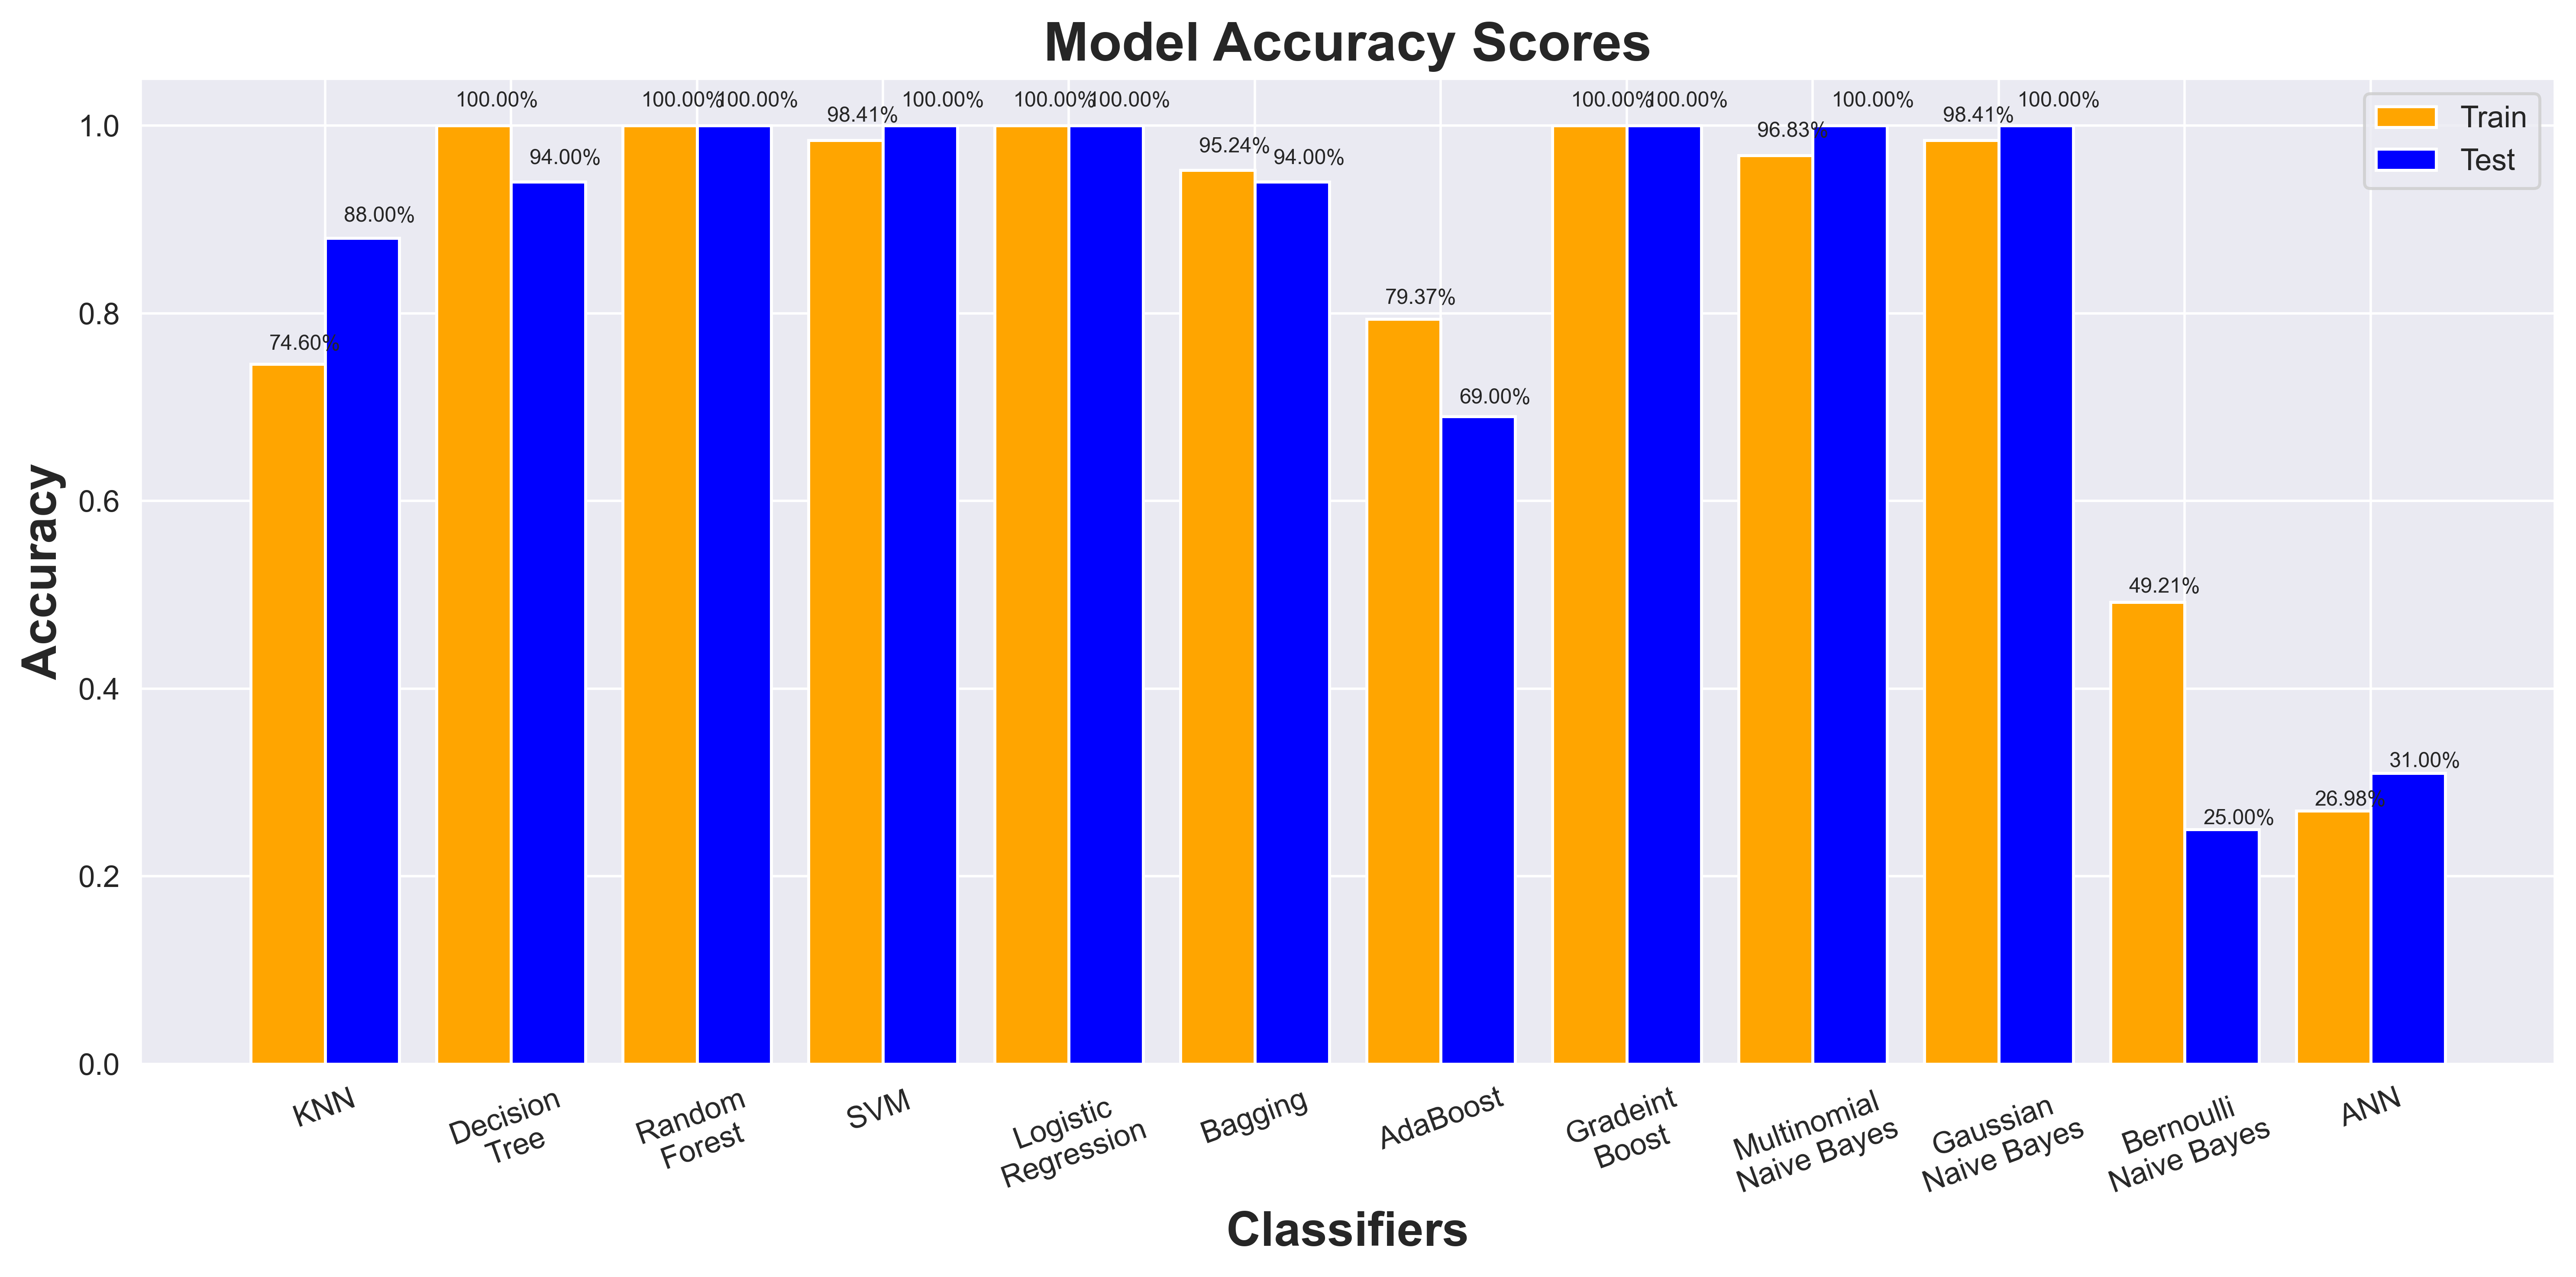

In [27]:
import matplotlib.pyplot as plt
import numpy as np

rcParams = {'xtick.labelsize':'12','ytick.labelsize':'14','axes.labelsize':'16'}
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=500)
x_pos = np.arange(len(table))
model_names = ["KNN", "Decision\nTree", "Random\nForest", "SVM ", "Logistic\nRegression", "Bagging", "AdaBoost", "Gradeint\nBoost","Multinomial\nNaive Bayes","Gaussian\nNaive Bayes","Bernoulli\nNaive Bayes","ANN"]

bar1 = plt.bar(x_pos - 0.2, table['Train_Accuracy(%)'], width=0.4, label='Train', color= "Orange")
bar2 = plt.bar(x_pos + 0.2, table['Test_Accuracy(%)'], width=0.4, label='Test', color= "b")
plt.xticks(x_pos, model_names)

plt.xlabel("Classifiers", fontsize = 16, fontweight = 'bold')
plt.ylabel("Accuracy", fontsize = 16, fontweight = 'bold')
plt.title("Model Accuracy Scores", fontsize = 18, fontweight = 'bold')
plt.xticks(rotation = 20)
plt.legend()

for i, bar in enumerate(bar1):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(Train_accuracies[i]), fontsize = 7)
    
for i, bar in enumerate(bar2):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(Test_accuracies[i]), fontsize = 7)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

----------

Here, in the word2vec dataset case, we can conclude that the models **Random Forest, Gradient Boosting, and Logistic Regression Classifiers** are giving the highest accuracies.

-------